In [1]:
# 나눔고딕 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,921 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and dire

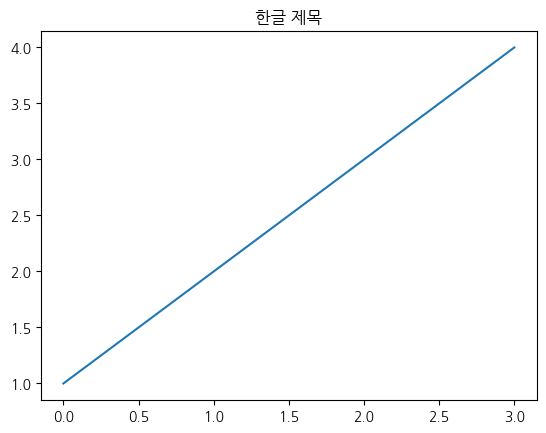

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 나눔고딕 볼드체 폰트 경로
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 나눔고딕 볼드체 폰트 등록
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

# 시각화 코드
plt.plot([1, 2, 3, 4])
plt.title('한글 제목')
plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Packages

In [4]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from datetime import date
import holidays
import geopandas as gpd

# address
base_url = '/content/drive/MyDrive/부산 출퇴근 지하철/'

# 부산시 인구 데이터

In [5]:
# 부산시 인구 데이터
busan_pop = pd.read_csv(f"{base_url}부산시 인구.csv", sep = '|')
# 필요한 연도만
year_list = ['Dec-22', 'Dec-21', 'Dec-20', 'Dec-19']
busan_pop = busan_pop[busan_pop['rate_year'].isin(year_list)]
# 연도 컬럼 생성
busan_pop['year'] = busan_pop['rate_year'].str.extract(r'(\d{2})')  # 연도의 앞 2자리 추출
busan_pop['year'] = '20' + busan_pop['year']  # '20'을 앞에 붙이기

# 부산광역시 구별 주민인구 등록
busan_pop_cnt = busan_pop[busan_pop['gugun'] != '부산광역시']
# 시군구 추출
busan_pop_cnt['시구군'] = busan_pop_cnt['gugun'].apply(lambda x: x[6:])
busan_pop_cnt = busan_pop_cnt[[ 'year', '시구군', 'dong_cnt', 'house_cnt', 'tot_pop_cnt',
       'm_pop_cnt', 'f_pop_cnt', 'pop_ratio', 'pop_density']]
busan_pop_cnt.reset_index(drop = True, inplace = True)

# 부산광역시 주민인구 등록
busan_pop_all = busan_pop[busan_pop['gugun'] == '부산광역시']
busan_pop_all = busan_pop_all[['year', 'gugun', 'dong_cnt', 'house_cnt', 'tot_pop_cnt',
       'm_pop_cnt', 'f_pop_cnt', 'pop_density']]
# 연도별로 정렬
busan_pop_all.sort_values(by='year', ascending=True, inplace = True)
busan_pop_all = busan_pop_all.reset_index(drop = True)

In [6]:
busan_pop_cnt.head()

,year,시구군,dong_cnt,house_cnt,tot_pop_cnt,m_pop_cnt,f_pop_cnt,pop_ratio,pop_density
0,2022,중구,9,23960,41909,20725,21184,1.2,14809
1,2022,서구,13,53626,107402,52118,55284,3.2,7699
2,2022,동구,12,46349,88601,43284,45317,2.6,8977
3,2022,영도구,11,54342,110254,54498,55756,3.3,7764
4,2022,부산진구,20,178049,358644,172214,186430,10.7,12088


In [7]:
busan_gpd = gpd.read_file('/content/drive/MyDrive/부산 출퇴근 지하철/부산_시군구/busan_sigungu.shp')
busan_gpd = busan_gpd[['SGG_NM','geometry']]
busan_gpd.head()

,SGG_NM,geometry
0,기장군,"MULTIPOLYGON (((129.22953 35.21716, 129.22938 ..."
1,사상구,"POLYGON ((128.99094 35.19385, 128.99121 35.193..."
2,수영구,"POLYGON ((129.11682 35.18344, 129.11689 35.183..."
3,연제구,"POLYGON ((129.07817 35.19945, 129.07827 35.199..."
4,강서구,"MULTIPOLYGON (((128.77648 35.01114, 128.77625 ..."


In [8]:
busan = pd.merge(busan_pop_cnt, busan_gpd, left_on = '시구군', right_on = 'SGG_NM', how = 'left')
busan_gpd = gpd.GeoDataFrame(busan, geometry='geometry')
busan_gpd.head()

,year,시구군,dong_cnt,house_cnt,tot_pop_cnt,m_pop_cnt,f_pop_cnt,pop_ratio,pop_density,SGG_NM,geometry
0,2022,중구,9,23960,41909,20725,21184,1.2,14809,중구,"POLYGON ((129.03231 35.11643, 129.03235 35.116..."
1,2022,서구,13,53626,107402,52118,55284,3.2,7699,서구,"MULTIPOLYGON (((129.01542 35.04808, 129.01515 ..."
2,2022,동구,12,46349,88601,43284,45317,2.6,8977,동구,"POLYGON ((129.04264 35.14589, 129.04327 35.145..."
3,2022,영도구,11,54342,110254,54498,55756,3.3,7764,영도구,"MULTIPOLYGON (((129.09320 35.03771, 129.09324 ..."
4,2022,부산진구,20,178049,358644,172214,186430,10.7,12088,부산진구,"POLYGON ((129.04001 35.19981, 129.04033 35.199..."


In [9]:
busan_2022 = busan_gpd[busan_gpd['year'] == '2022']
busan_2022.columns

Index(['year', '시구군', 'dong_cnt', 'house_cnt', 'tot_pop_cnt', 'm_pop_cnt',
       'f_pop_cnt', 'pop_ratio', 'pop_density', 'SGG_NM', 'geometry'],
      dtype='object')

In [10]:
import geopandas as gpd
import plotly.express as px
import json

# Convert to GeoJSON
geojson = json.loads(busan_2022.to_json())

# Create the choropleth map
fig = px.choropleth_mapbox(busan_2022, geojson=geojson, locations=busan_2022['시구군'], featureidkey="properties.SGG_NM",
                           color="tot_pop_cnt",
                           color_continuous_scale='Blues',
                           mapbox_style="carto-positron", zoom=9, center={"lat": 35.1796, "lon": 129.0756})

fig.show()

In [11]:
busan_2022 = busan_2022.sort_values(by = 'tot_pop_cnt')[::-1].reset_index(drop = True)

<Axes: xlabel='tot_pop_cnt', ylabel='시구군'>

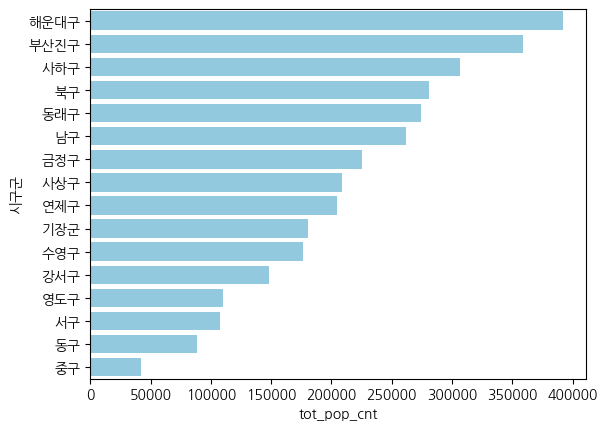

In [12]:
sns.barplot(x=busan_2022['tot_pop_cnt'],y=busan_2022['시구군'], color ='skyBlue')

# 부산 지하철

In [58]:
# 2022
df_22 =  pd.read_csv(f"{base_url}2022.csv", encoding = 'cp949')
# 2023
df_23 =  pd.read_csv(f"{base_url}2023.csv", encoding = 'cp949')
# 데이터 합치기
df = pd.concat([df_22, df_23])

# 2호선만 분석 진행
# 201-243 (장산 - 양산)
num = list(range(201,244))
df_line = df[df['역번호'].isin(num)]

# 공백 삭제
df_line['역명'] = df_line['역명'].str.replace(' ', '')

# 출퇴근 시간대 07-10, 17-19
df_line = df_line[['역명', '년월일', '요일', '구분', '합계','07시-08시', '08시-09시', '09시-10시','17시-18시','18시-19시','19시-20시']]

# 평일만 추출
week = ['월','화','수','목','금']
df_line_week = df_line[df_line['요일'].isin(week)]
df_line_week.reset_index(inplace = True,drop=True)

# 합계 부분 , 제거
def convert_to_integer(value):
    value = str(value).replace(',', '')
    try:
        return int(value)
    except ValueError:
        return np.nan

df_line_week['합계'] = df_line_week['합계'].map(convert_to_integer)
df_line_week['07시-08시'] = df_line_week['07시-08시'].map(convert_to_integer)
df_line_week['08시-09시'] = df_line_week['08시-09시'].map(convert_to_integer)
df_line_week['09시-10시'] = df_line_week['09시-10시'].map(convert_to_integer)
df_line_week['17시-18시'] = df_line_week['17시-18시'].map(convert_to_integer)
df_line_week['18시-19시'] = df_line_week['18시-19시'].map(convert_to_integer)
df_line_week['19시-20시'] = df_line_week['19시-20시'].map(convert_to_integer)

import holidays

# 한국의 공휴일 객체 생성
kr_holidays = holidays.KR(years=[2022, 2023])

# 2022년과 2023년 공휴일 리스트 생성
holiday_dates = [str(date) for date in kr_holidays.keys()]

substitute_holidays = [
    "2022-09-12",
    "2022-10-10",
    "2023-01-24",
    "2023-05-29"
]
holidays = holiday_dates + substitute_holidays
# 데이터프레임에서 공휴일을 제외한 행 선택
df_line_week = df_line_week[~df_line_week['년월일'].astype('datetime64').isin(holidays)]

df_line_week['출근시간대'] = df_line_week['07시-08시'] + df_line_week['08시-09시'] + df_line_week['09시-10시']
df_line_week['퇴근시간대'] = df_line_week['17시-18시'] + df_line_week['18시-19시'] + df_line_week['19시-20시']
df_line_week['출근시간대 비율'] = round(df_line_week['출근시간대'] / df_line_week['합계'] * 100, 1)
df_line_week['퇴근시간대 비율'] = round(df_line_week['퇴근시간대'] / df_line_week['합계'] * 100, 1)
df_line_week.head()

,역명,년월일,요일,구분,합계,07시-08시,08시-09시,09시-10시,17시-18시,18시-19시,19시-20시,출근시간대,퇴근시간대,출근시간대 비율,퇴근시간대 비율
0,장산,2022-01-03,월,승차,13829,1185,1474,874,1137,1111,508,3533,2756,25.5,19.9
1,장산,2022-01-03,월,하차,13429,467,1068,834,1113,1625,1052,2369,3790,17.6,28.2
2,장산,2022-01-04,화,승차,14287,1143,1511,822,1232,1078,601,3476,2911,24.3,20.4
3,장산,2022-01-04,화,하차,13998,520,1071,844,1295,1705,989,2435,3989,17.4,28.5
4,장산,2022-01-05,수,승차,14214,1103,1522,881,1153,1078,515,3506,2746,24.7,19.3


In [59]:
kysung = df_line_week[df_line_week['역명']=='경성대부경대']
kysung = kysung.reset_index(drop = True)
kysung.head(3)

,역명,년월일,요일,구분,합계,07시-08시,08시-09시,09시-10시,17시-18시,18시-19시,19시-20시,출근시간대,퇴근시간대,출근시간대 비율,퇴근시간대 비율
0,경성대부경대,2022-01-03,월,승차,12535,763,1351,712,1116,1238,590,2826,2944,22.5,23.5
1,경성대부경대,2022-01-03,월,하차,13672,332,1279,952,1199,1989,902,2563,4090,18.7,29.9
2,경성대부경대,2022-01-04,화,승차,12984,796,1459,711,1135,1264,583,2966,2982,22.8,23.0


In [60]:
kysung_up = kysung[kysung['구분']=='승차']
kysung_up = kysung_up.reset_index(drop = True)
kysung_up.head(3)

,역명,년월일,요일,구분,합계,07시-08시,08시-09시,09시-10시,17시-18시,18시-19시,19시-20시,출근시간대,퇴근시간대,출근시간대 비율,퇴근시간대 비율
0,경성대부경대,2022-01-03,월,승차,12535,763,1351,712,1116,1238,590,2826,2944,22.5,23.5
1,경성대부경대,2022-01-04,화,승차,12984,796,1459,711,1135,1264,583,2966,2982,22.8,23.0
2,경성대부경대,2022-01-05,수,승차,12928,777,1438,680,1190,1287,525,2895,3002,22.4,23.2


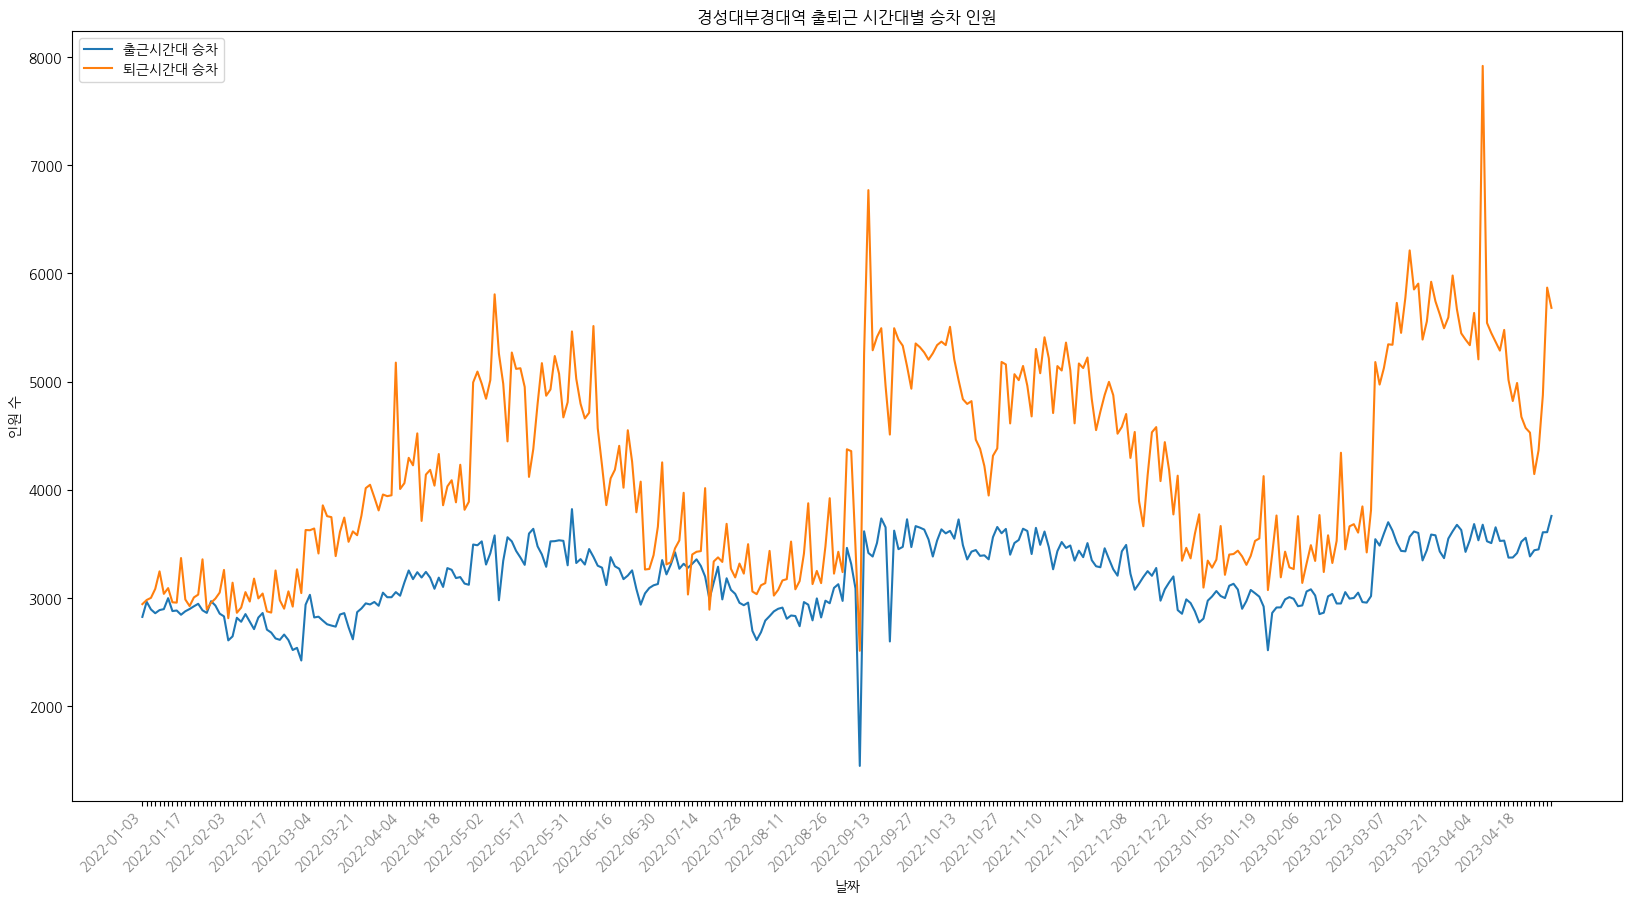

In [61]:
# 시각화
plt.figure(figsize=(20, 10))

# 출근 시간대 승차
plt.plot(kysung_up['년월일'], kysung_up['출근시간대'], label='출근시간대 승차')

# 퇴근 시간대 승차
plt.plot(kysung_up['년월일'], kysung_up['퇴근시간대'], label='퇴근시간대 승차')

# 그래프 타이틀 및 레이블 설정
plt.title('경성대부경대역 출퇴근 시간대별 승차 인원')
plt.xlabel('날짜')
plt.ylabel('인원 수')

# x축 레이블 간격 조정
for index, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if index % 10 != 0:  # 10일 간격으로 레이블 표시
        label.set_visible(False)

# x축 레이블 회전 및 색상 조정
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right', color='grey')

plt.legend()
plt.grid(False)

# 그래프 표시
plt.show()

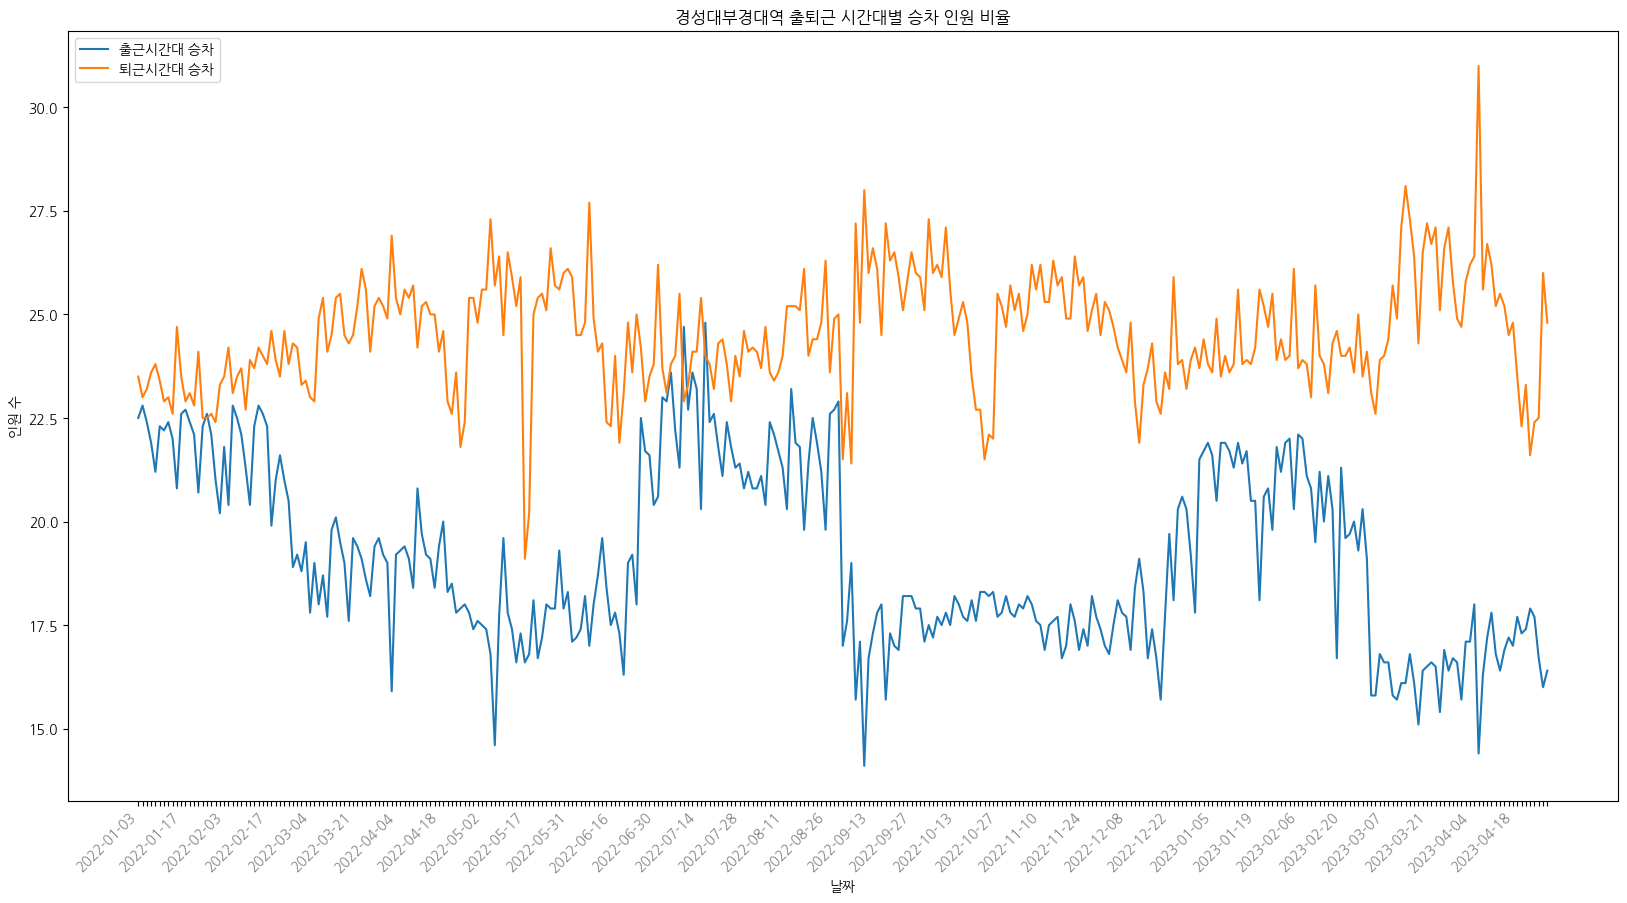

In [62]:
# 시각화
plt.figure(figsize=(20, 10))

# 출근 시간대 승차
plt.plot(kysung_up['년월일'], kysung_up['출근시간대 비율'], label='출근시간대 승차')

# 퇴근 시간대 승차
plt.plot(kysung_up['년월일'], kysung_up['퇴근시간대 비율'], label='퇴근시간대 승차')

# 그래프 타이틀 및 레이블 설정
plt.title('경성대부경대역 출퇴근 시간대별 승차 인원 비율')
plt.xlabel('날짜')
plt.ylabel('인원 수')

# x축 레이블 간격 조정
for index, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if index % 10 != 0:  # 10일 간격으로 레이블 표시
        label.set_visible(False)

# x축 레이블 회전 및 색상 조정
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right', color='grey')

plt.legend()
plt.grid(False)

# 그래프 표시
plt.show()

In [63]:
kysung_down = kysung[kysung['구분']=='하차']
kysung_down = kysung_down.reset_index(drop = True)
kysung_down.head(3)

,역명,년월일,요일,구분,합계,07시-08시,08시-09시,09시-10시,17시-18시,18시-19시,19시-20시,출근시간대,퇴근시간대,출근시간대 비율,퇴근시간대 비율
0,경성대부경대,2022-01-03,월,하차,13672,332,1279,952,1199,1989,902,2563,4090,18.7,29.9
1,경성대부경대,2022-01-04,화,하차,13847,326,1228,947,1294,2010,947,2501,4251,18.1,30.7
2,경성대부경대,2022-01-05,수,하차,13664,324,1233,921,1285,1942,905,2478,4132,18.1,30.2


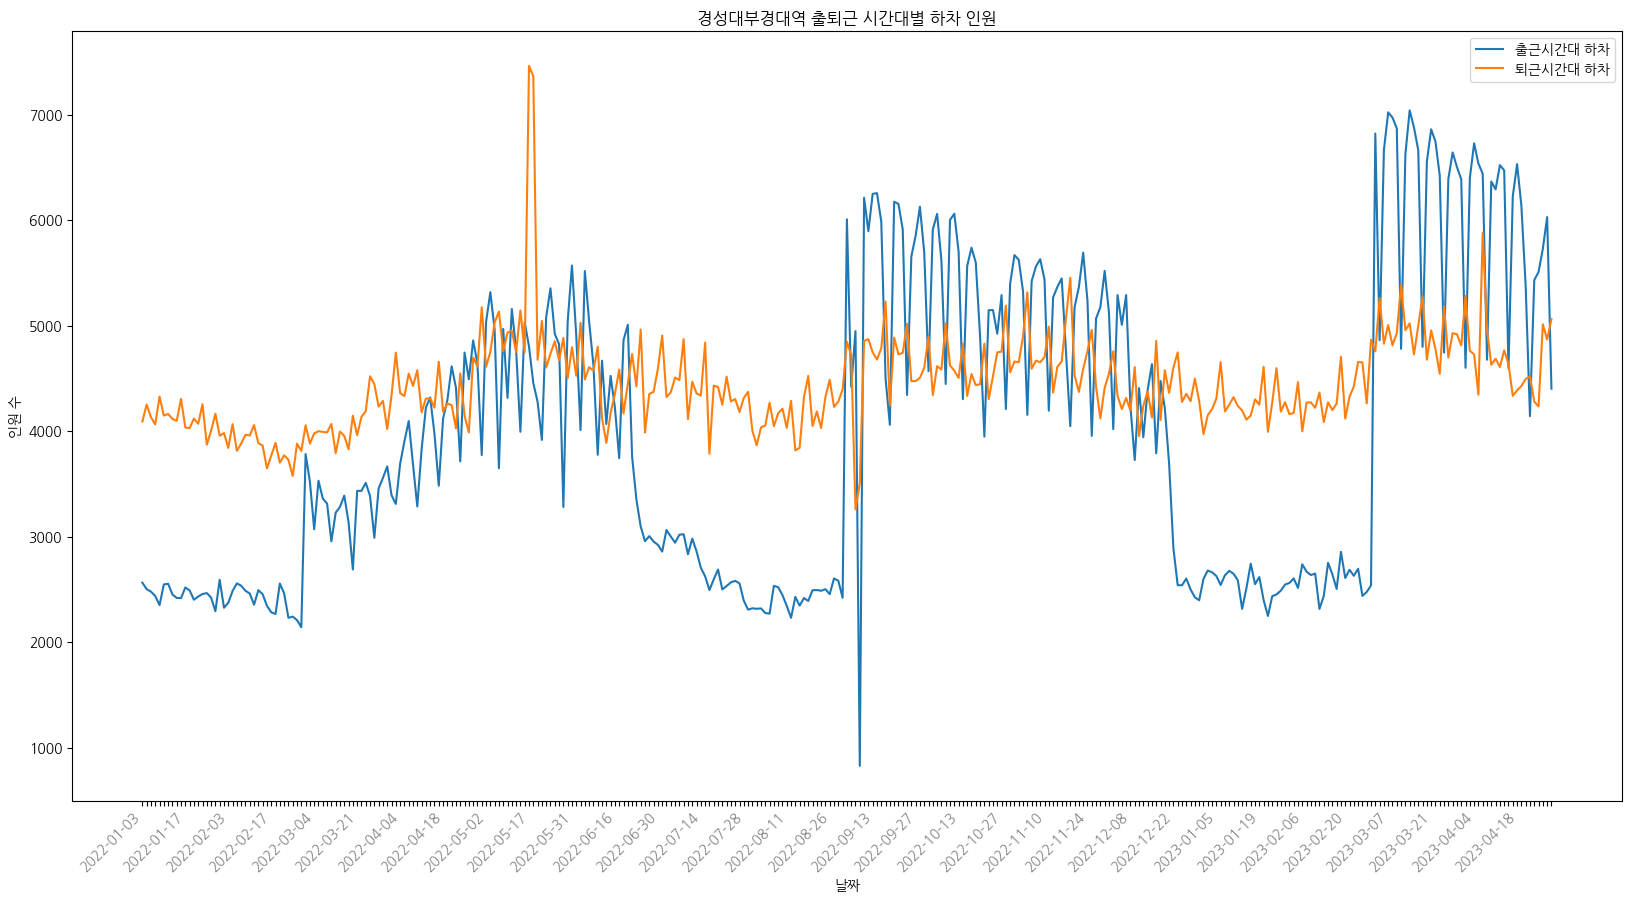

In [64]:
# 시각화
plt.figure(figsize=(20, 10))

# 출근 시간대 승차
plt.plot(kysung_down['년월일'], kysung_down['출근시간대'], label='출근시간대 하차')

# 퇴근 시간대 승차
plt.plot(kysung_down['년월일'], kysung_down['퇴근시간대'], label='퇴근시간대 하차')

# 그래프 타이틀 및 레이블 설정
plt.title('경성대부경대역 출퇴근 시간대별 하차 인원')
plt.xlabel('날짜')
plt.ylabel('인원 수')

# x축 레이블 간격 조정
for index, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if index % 10 != 0:  # 10일 간격으로 레이블 표시
        label.set_visible(False)

# x축 레이블 회전 및 색상 조정
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right', color='grey')

plt.legend()
plt.grid(False)

# 그래프 표시
plt.show()

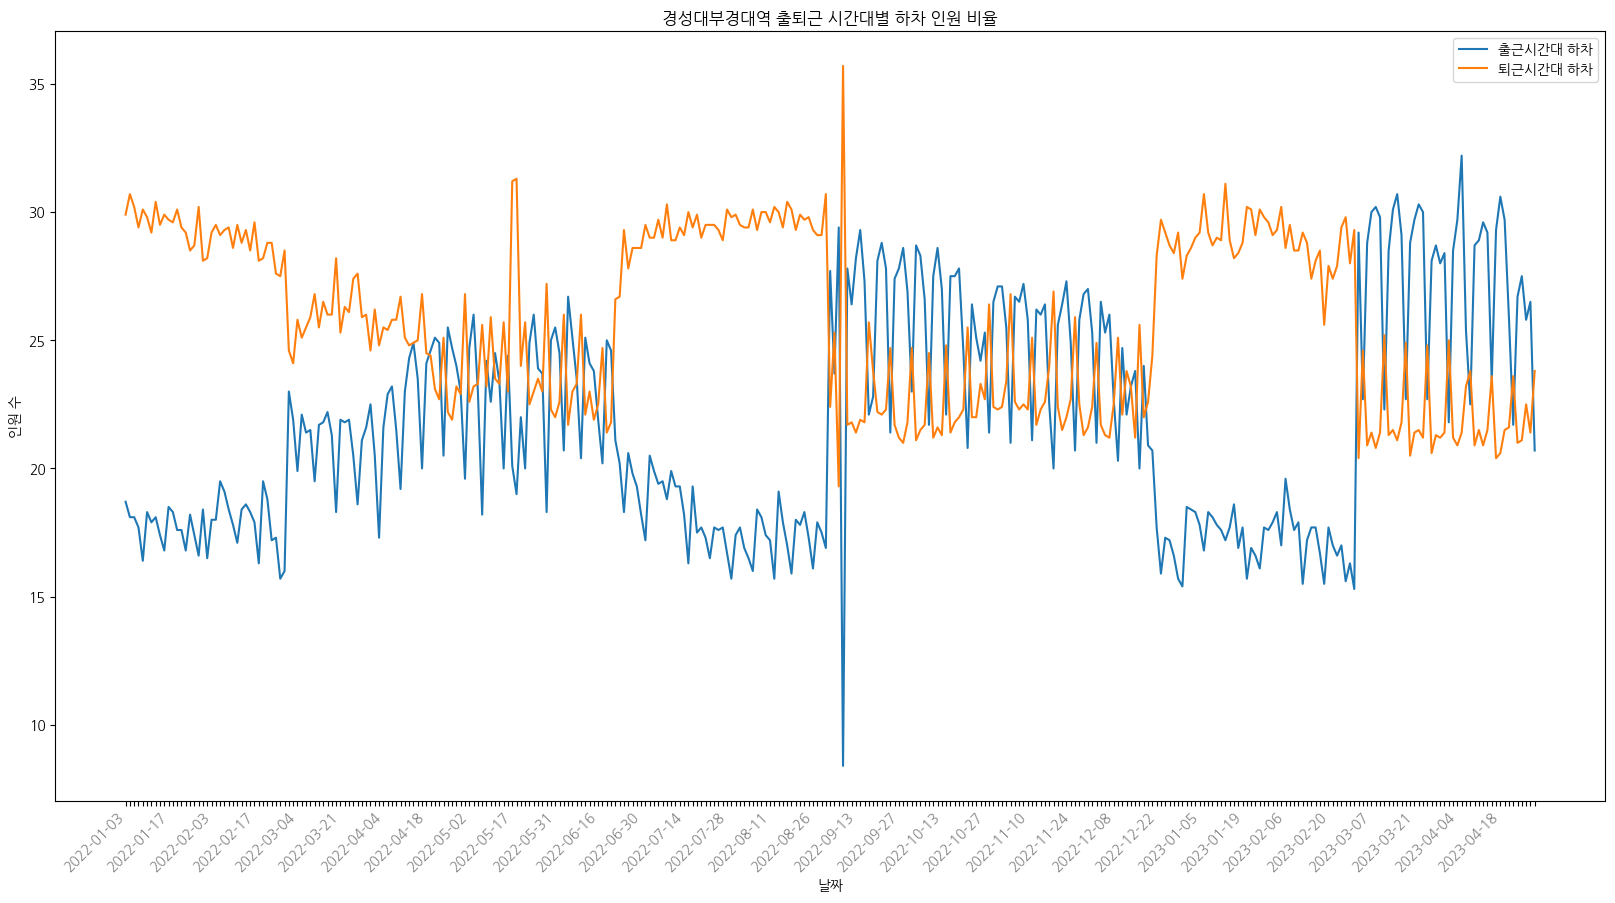

In [65]:
# 시각화
plt.figure(figsize=(20, 10))

# 출근 시간대 승차
plt.plot(kysung_down['년월일'], kysung_down['출근시간대 비율'], label='출근시간대 하차')

# 퇴근 시간대 승차
plt.plot(kysung_down['년월일'], kysung_down['퇴근시간대 비율'], label='퇴근시간대 하차')

# 그래프 타이틀 및 레이블 설정
plt.title('경성대부경대역 출퇴근 시간대별 하차 인원 비율')
plt.xlabel('날짜')
plt.ylabel('인원 수')

# x축 레이블 간격 조정
for index, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if index % 10 != 0:  # 10일 간격으로 레이블 표시
        label.set_visible(False)

# x축 레이블 회전 및 색상 조정
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right', color='grey')

plt.legend()
plt.grid(False)

# 그래프 표시
plt.show()

In [68]:
sentam = df_line_week[df_line_week['역명']=='센텀시티']
sentam = sentam.reset_index(drop = True)
# 출근 시간대와 퇴근 시간대의 승차 및 하차 인원 합계를 계산
sentam['출근시간대'] = sentam['07시-08시'] + sentam['08시-09시'] + sentam['09시-10시']
sentam['퇴근시간대'] = sentam['17시-18시'] + sentam['18시-19시'] + sentam['19시-20시']
sentam.head(3)

,역명,년월일,요일,구분,합계,07시-08시,08시-09시,09시-10시,17시-18시,18시-19시,19시-20시,출근시간대,퇴근시간대,출근시간대 비율,퇴근시간대 비율
0,센텀시티,2022-01-03,월,승차,15664,345,561,346,1797,3278,1552,1252,6627,8.0,42.3
1,센텀시티,2022-01-03,월,하차,15743,726,3027,2266,970,1012,504,6019,2486,38.2,15.8
2,센텀시티,2022-01-04,화,승차,16227,351,585,386,1888,3363,1554,1322,6805,8.1,41.9


In [69]:
sentam_up = sentam[sentam['구분']=='승차']
sentam_up = sentam_up.reset_index(drop = True)
sentam_up.head(3)

,역명,년월일,요일,구분,합계,07시-08시,08시-09시,09시-10시,17시-18시,18시-19시,19시-20시,출근시간대,퇴근시간대,출근시간대 비율,퇴근시간대 비율
0,센텀시티,2022-01-03,월,승차,15664,345,561,346,1797,3278,1552,1252,6627,8.0,42.3
1,센텀시티,2022-01-04,화,승차,16227,351,585,386,1888,3363,1554,1322,6805,8.1,41.9
2,센텀시티,2022-01-05,수,승차,16277,322,605,364,1981,3359,1404,1291,6744,7.9,41.4


In [70]:
sentam_up[sentam_up['퇴근시간대'] == sentam_up['퇴근시간대'].max()]

,역명,년월일,요일,구분,합계,07시-08시,08시-09시,09시-10시,17시-18시,18시-19시,19시-20시,출근시간대,퇴근시간대,출근시간대 비율,퇴근시간대 비율
216,센텀시티,2022-11-18,금,승차,33949,441,716,505,6325,7608,2495,1662,16428,4.9,48.4


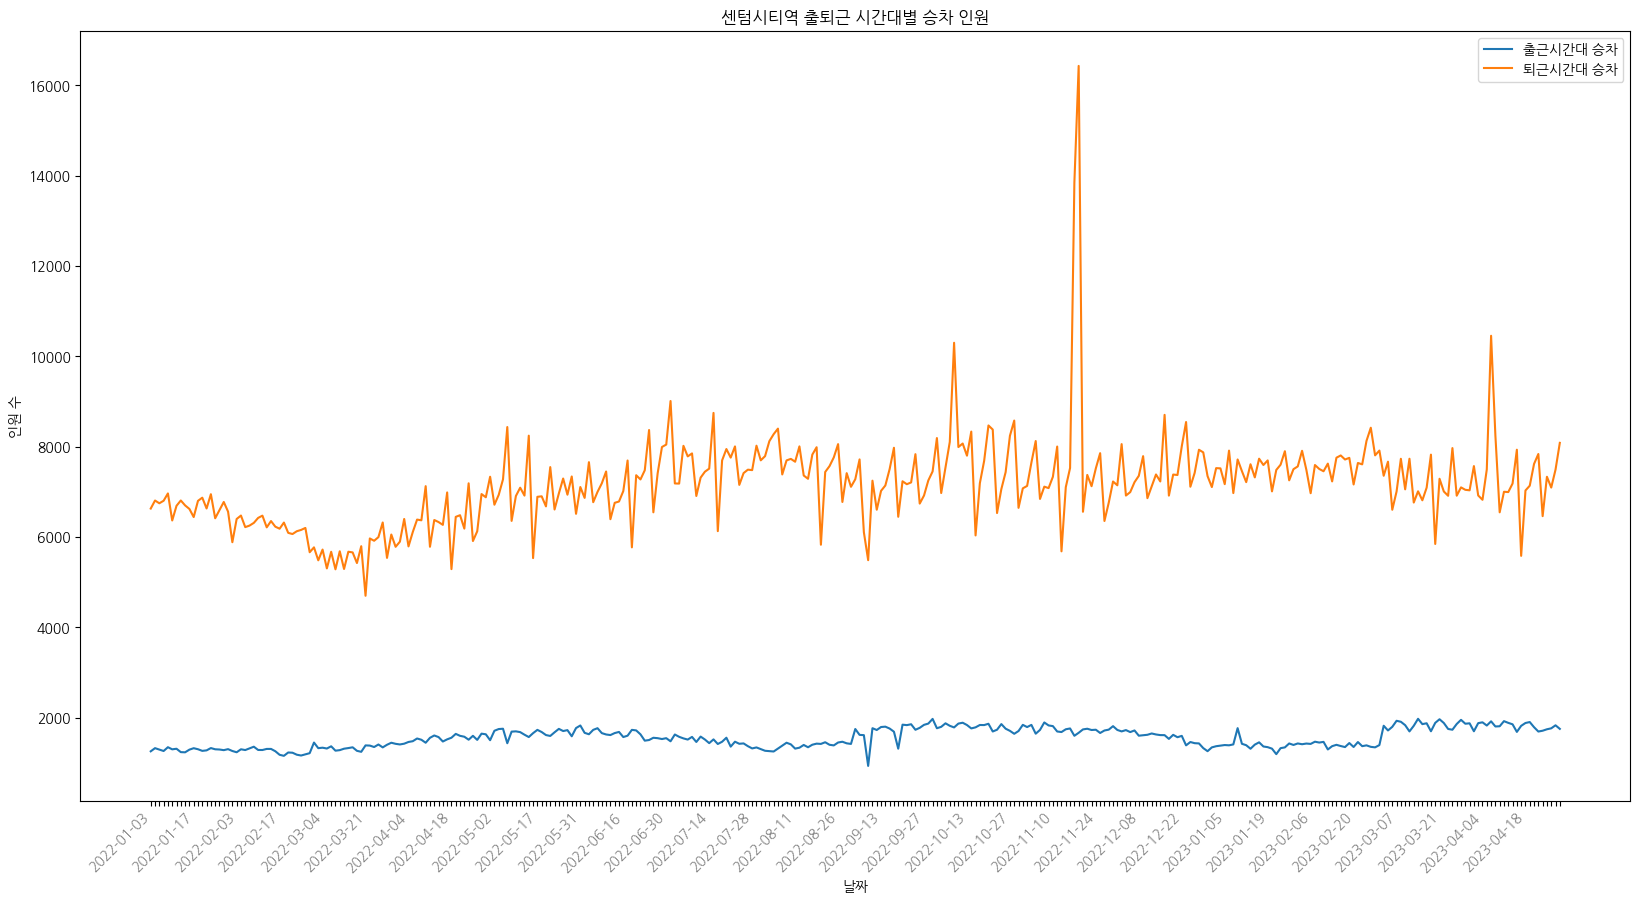

In [71]:
# 시각화
plt.figure(figsize=(20, 10))

# 출근 시간대 승차
plt.plot(sentam_up['년월일'], sentam_up['출근시간대'], label='출근시간대 승차')

# 퇴근 시간대 승차
plt.plot(sentam_up['년월일'], sentam_up['퇴근시간대'], label='퇴근시간대 승차')

# 그래프 타이틀 및 레이블 설정
plt.title('센텀시티역 출퇴근 시간대별 승차 인원')
plt.xlabel('날짜')
plt.ylabel('인원 수')

# x축 레이블 간격 조정
for index, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if index % 10 != 0:  # 10일 간격으로 레이블 표시
        label.set_visible(False)

# x축 레이블 회전 및 색상 조정
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right', color='grey')

plt.legend()
plt.grid(False)

# 그래프 표시
plt.show()

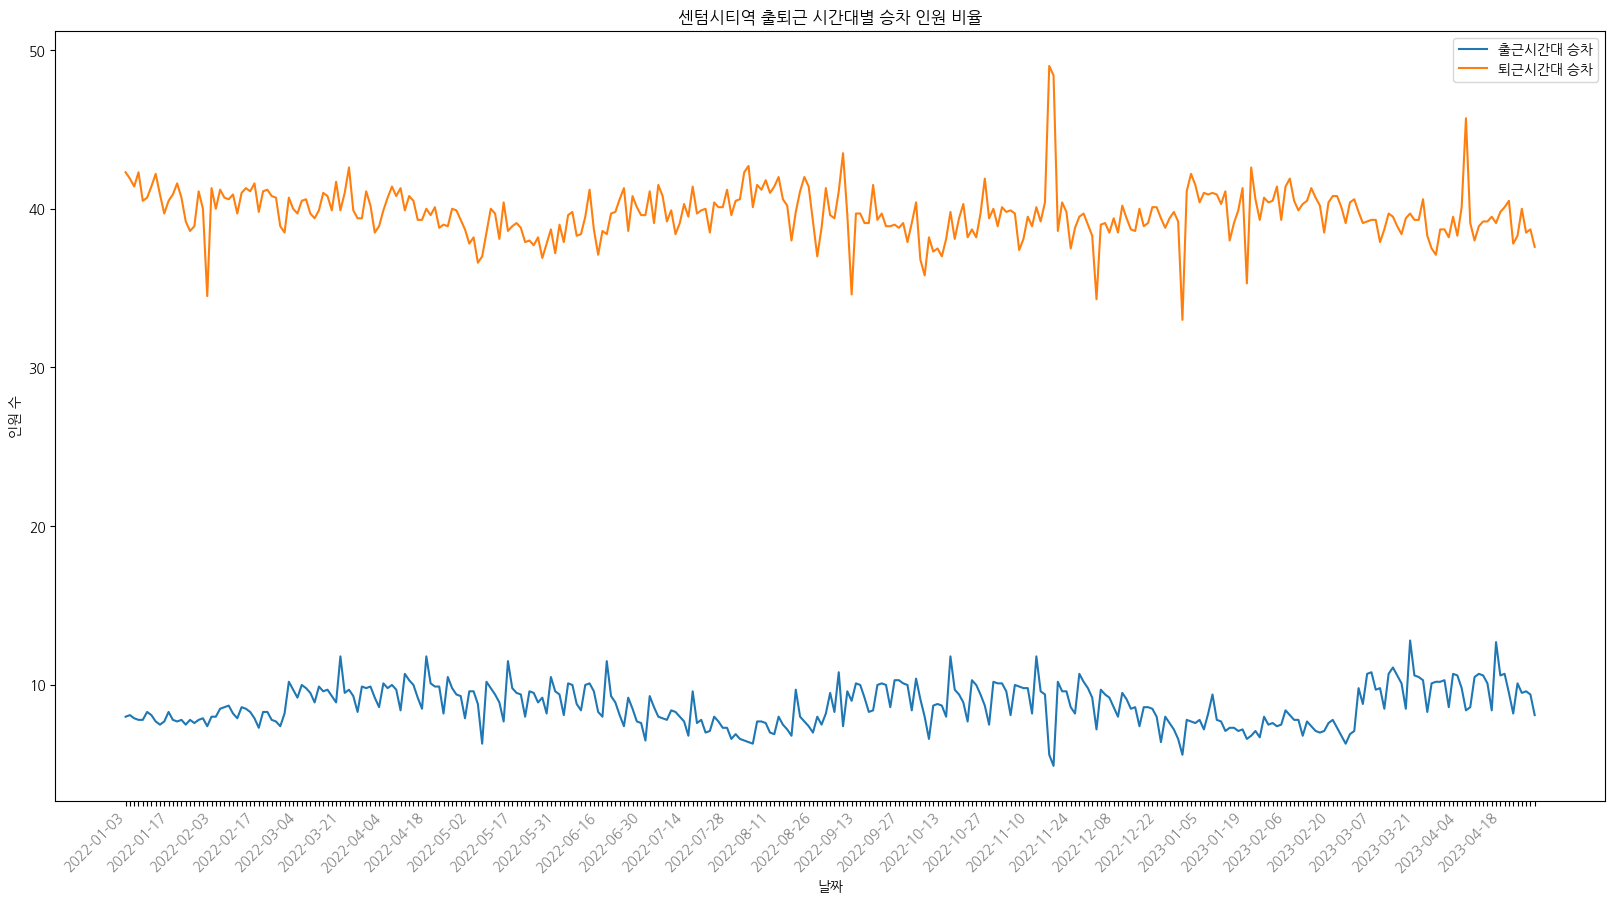

In [72]:
# 시각화
plt.figure(figsize=(20, 10))

# 출근 시간대 승차
plt.plot(sentam_up['년월일'], sentam_up['출근시간대 비율'], label='출근시간대 승차')

# 퇴근 시간대 승차
plt.plot(sentam_up['년월일'], sentam_up['퇴근시간대 비율'], label='퇴근시간대 승차')

# 그래프 타이틀 및 레이블 설정
plt.title('센텀시티역 출퇴근 시간대별 승차 인원 비율')
plt.xlabel('날짜')
plt.ylabel('인원 수')

# x축 레이블 간격 조정
for index, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if index % 10 != 0:  # 10일 간격으로 레이블 표시
        label.set_visible(False)

# x축 레이블 회전 및 색상 조정
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right', color='grey')

plt.legend()
plt.grid(False)

# 그래프 표시
plt.show()

In [75]:
sentam_down = sentam[sentam['구분']=='하차']
sentam_down = sentam_down.reset_index(drop = True)
sentam_down.head(3)

,역명,년월일,요일,구분,합계,07시-08시,08시-09시,09시-10시,17시-18시,18시-19시,19시-20시,출근시간대,퇴근시간대,출근시간대 비율,퇴근시간대 비율
0,센텀시티,2022-01-03,월,하차,15743,726,3027,2266,970,1012,504,6019,2486,38.2,15.8
1,센텀시티,2022-01-04,화,하차,16306,727,3021,2306,991,1184,472,6054,2647,37.1,16.2
2,센텀시티,2022-01-05,수,하차,16206,754,3029,2254,992,1184,449,6037,2625,37.3,16.2


In [76]:
sentam_down[sentam_down['출근시간대']==sentam_down['출근시간대'].max()]

,역명,년월일,요일,구분,합계,07시-08시,08시-09시,09시-10시,17시-18시,18시-19시,19시-20시,출근시간대,퇴근시간대,출근시간대 비율,퇴근시간대 비율
216,센텀시티,2022-11-18,금,하차,29245,998,4524,4150,1680,1557,749,9672,3986,33.1,13.6


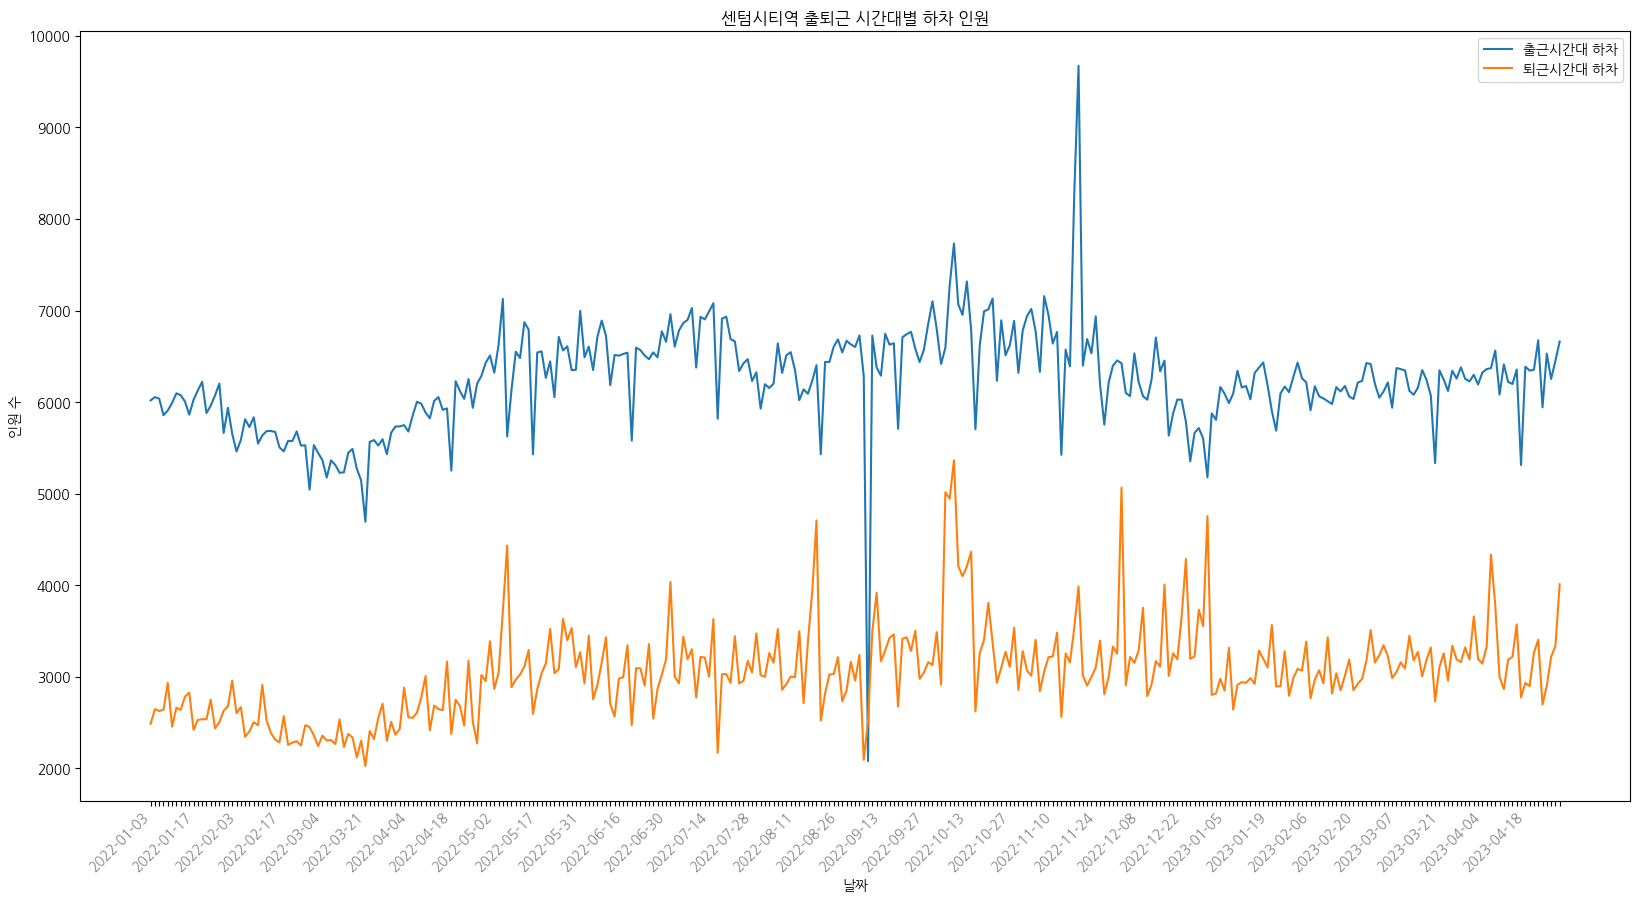

In [77]:
# 시각화
plt.figure(figsize=(20, 10))

# 출근 시간대 승차
plt.plot(sentam_down['년월일'], sentam_down['출근시간대'], label='출근시간대 하차')

# 퇴근 시간대 승차
plt.plot(sentam_down['년월일'], sentam_down['퇴근시간대'], label='퇴근시간대 하차')

# 그래프 타이틀 및 레이블 설정
plt.title('센텀시티역 출퇴근 시간대별 하차 인원')
plt.xlabel('날짜')
plt.ylabel('인원 수')

# x축 레이블 간격 조정
for index, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if index % 10 != 0:  # 10일 간격으로 레이블 표시
        label.set_visible(False)

# x축 레이블 회전 및 색상 조정
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right', color='grey')

plt.legend()
plt.grid(False)

# 그래프 표시
plt.show()

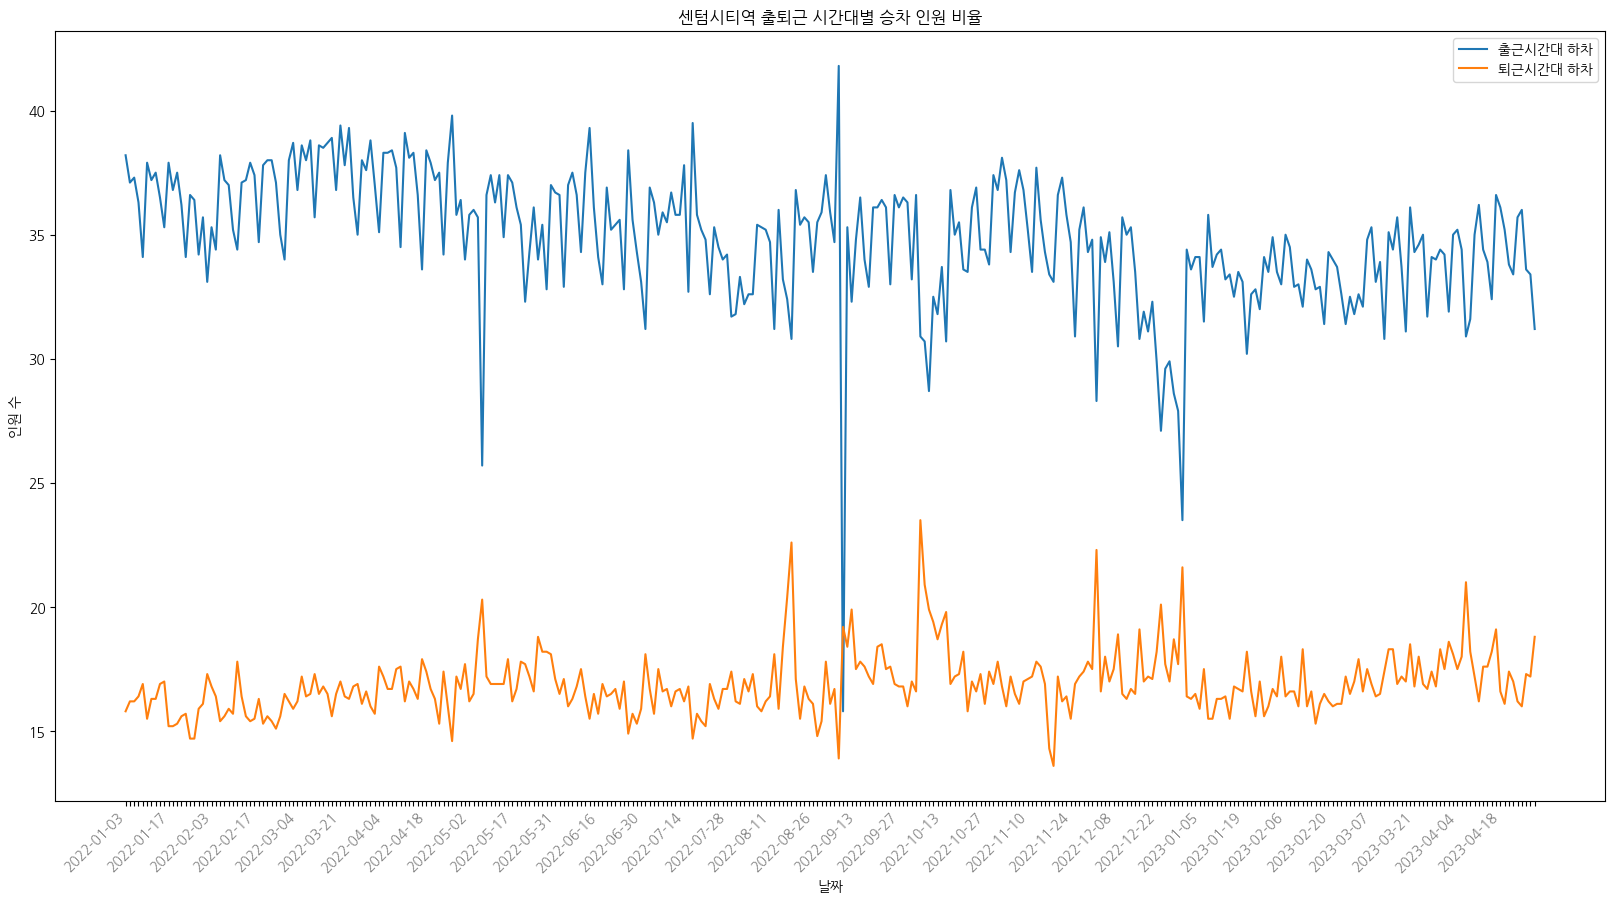

In [78]:
# 시각화
plt.figure(figsize=(20, 10))

# 출근 시간대 승차
plt.plot(sentam_down['년월일'], sentam_down['출근시간대 비율'], label='출근시간대 하차')

# 퇴근 시간대 승차
plt.plot(sentam_down['년월일'], sentam_down['퇴근시간대 비율'], label='퇴근시간대 하차')

# 그래프 타이틀 및 레이블 설정
plt.title('센텀시티역 출퇴근 시간대별 승차 인원 비율')
plt.xlabel('날짜')
plt.ylabel('인원 수')

# x축 레이블 간격 조정
for index, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if index % 10 != 0:  # 10일 간격으로 레이블 표시
        label.set_visible(False)

# x축 레이블 회전 및 색상 조정
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right', color='grey')

plt.legend()
plt.grid(False)

# 그래프 표시
plt.show()

In [79]:
# 각 시간대별 지하철 도착 시간
ks_jansan = {
    7: [6, 13, 20, 26, 32, 38, 44, 49, 54, 59],
    8: [4, 9, 14, 18, 23, 27, 32, 36, 41, 45, 50, 54, 59],
    9: [3, 8, 12, 17, 22, 27, 32, 37, 42, 47, 52, 59],
    17: [1, 7, 14, 20, 26, 31, 36, 40, 45, 49, 54, 58],
    18: [3, 7, 12, 16, 21, 25, 30, 34, 39, 43, 48, 52, 57],
    19: [1, 6, 10, 15, 19, 24, 28, 33, 38, 44, 50, 56]
}

ks_yansan = {
    7: [4, 13, 19, 24, 28, 33, 37, 42, 46, 51, 55],
    8: [0, 4, 9, 13, 18, 22, 27, 31, 36, 40, 45, 49, 54, 59],
    9: [4, 9, 14, 19, 24, 29, 34, 40, 46, 52, 58],
    17: [2, 8, 13, 17, 22, 26, 31, 35, 40, 44, 49, 53, 58],
    18: [2, 7, 11, 16, 20, 25, 29, 34, 38, 43, 47, 52, 56],
    19: [1, 6, 12, 18, 25, 31, 38, 44, 51, 57]
}

st_jansan = {
    7: [0, 10, 16, 22, 28, 34, 40, 45, 50, 54, 59],
    8: [3, 8, 12, 17, 21, 26, 30, 35, 39, 44, 48, 53, 57],
    9: [2, 6, 11, 15, 20, 25, 30, 35, 40, 46, 52, 58],
    17: [1, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57],
    18: [2, 7, 12, 17, 22, 27, 32, 36, 41, 45, 50, 54, 59],
    19: [3, 8, 12, 17, 23, 29, 35, 41, 47, 53, 59]
}

st_yansan = {
    7: [1, 7, 14, 20, 27, 33, 39, 44, 49, 53, 58],
    8: [2, 7, 11, 16, 20, 25, 29, 34, 38, 43, 47, 52, 56],
    9: [1, 5, 10, 14, 19, 23, 28, 32, 37, 42, 48, 55],
    17: [4, 9, 14, 19, 24, 29, 34, 39, 43, 48, 52, 57],
    18: [1, 6, 10, 15, 19, 24, 28, 33, 38, 43, 48, 53, 58],
    19: [3, 8, 13, 18, 24, 29, 35, 40, 46, 51, 57]
}

In [81]:
print(sum(len(ks_jansan[hour]) for hour in ks_jansan))
print(sum(len(ks_yansan[hour]) for hour in ks_yansan))
print(sum(len(st_jansan[hour]) for hour in st_jansan))
print(sum(len(st_yansan[hour]) for hour in st_yansan))

72
72
72
72


# 부산 버스

In [28]:
# 지하철 위치
subway_loc = pd.read_csv(f'{base_url}지하철 위치.csv')

# 결측값 삭제
subway_loc = subway_loc.dropna(subset=['ROAD_NM_ADDR'])
# 부산광역시만 추출
busan_subway_loc = subway_loc[subway_loc['ROAD_NM_ADDR'].str.startswith('부산광역시')]
# 필요한 컬럼 추출
busan_subway_loc = busan_subway_loc[['SBW_STATN_NM', 'ROAD_NM_ADDR', 'SBW_STATN_XCRD', 'SBW_STATN_YCRD']]
busan_subway_loc.reset_index(drop = True, inplace = True)
# 시군구 추출
busan_subway_loc['시군구'] = busan_subway_loc['ROAD_NM_ADDR'].str.extract(r'(\w+구)')
busan_subway_loc_cnt = busan_subway_loc['시군구'].value_counts().reset_index()

# 인구 + 지하철역 수
busan_pop_cnt_subway = pd.merge(busan_pop_cnt, busan_subway_loc_cnt, left_on = '시구군', right_on = 'index', how = 'left')

# 결측값을 0으로 대체, 컬럼 전처리
busan_pop_cnt_subway = busan_pop_cnt_subway.fillna(0)
busan_pop_cnt_subway.drop(columns = ['index'], inplace = True)
busan_pop_cnt_subway.rename(columns = {'시군구' : '역개수'}, inplace = True)

# 버스 정류장
bus_station = gpd.read_file(f'{base_url}부산광역시_버스 정류소 정보(SHP)/tl_bus_station_info.shp', geometry = 'geometry')
# 시군구 지리
sigungu = gpd.read_file(f'{base_url}부산_시군구/busan_sigungu.shp', encoding = 'utf-8', geometry = 'geometry')

# 공간 조인 수행
result = gpd.sjoin(sigungu, bus_station, op='contains')

# 각 시군구별 정류장 개수 계산
grouped = result.groupby('SGG_NM').size().reset_index(name='정류장 개수')

busan_pop_cnt_subway_bus = pd.merge(busan_pop_cnt_subway, grouped, left_on = '시구군', right_on = 'SGG_NM', how = 'left')
busan_pop_cnt_subway_bus.drop(columns = ['SGG_NM'], inplace = True)

In [29]:
busan_pop_cnt_subway_bus['geometry'] = busan['geometry']

In [30]:
busan_pop_cnt_subway_bus.head()

,year,시구군,dong_cnt,house_cnt,tot_pop_cnt,m_pop_cnt,f_pop_cnt,pop_ratio,pop_density,역개수,정류장 개수,geometry
0,2022,중구,9,23960,41909,20725,21184,1.2,14809,3.0,124,"POLYGON ((129.03231 35.11643, 129.03235 35.116..."
1,2022,서구,13,53626,107402,52118,55284,3.2,7699,3.0,312,"MULTIPOLYGON (((129.01542 35.04808, 129.01515 ..."
2,2022,동구,12,46349,88601,43284,45317,2.6,8977,5.0,246,"POLYGON ((129.04264 35.14589, 129.04327 35.145..."
3,2022,영도구,11,54342,110254,54498,55756,3.3,7764,0.0,400,"MULTIPOLYGON (((129.09320 35.03771, 129.09324 ..."
4,2022,부산진구,20,178049,358644,172214,186430,10.7,12088,11.0,662,"POLYGON ((129.04001 35.19981, 129.04033 35.199..."


In [31]:
df = busan_pop_cnt_subway_bus[(busan_pop_cnt_subway_bus['year'] == '2022') & (busan_pop_cnt_subway_bus['시구군'].isin(['남구','해운대구']))]
df

,year,시구군,dong_cnt,house_cnt,tot_pop_cnt,m_pop_cnt,f_pop_cnt,pop_ratio,pop_density,역개수,정류장 개수,geometry
6,2022,남구,17,117601,262253,128182,134071,7.8,9778,6.0,525,"MULTIPOLYGON (((129.12702 35.09096, 129.12697 ..."
8,2022,해운대구,18,170435,391763,187958,203805,11.6,7601,15.0,599,"MULTIPOLYGON (((129.13898 35.15860, 129.13963 ..."


In [32]:
busan_xy = gpd.GeoDataFrame(df, geometry='geometry')

In [33]:
bus_station = gpd.read_file('/content/drive/MyDrive/부산 출퇴근 지하철/부산광역시_버스 정류소 정보(SHP)/tl_bus_station_info.shp')
bus_station.head()

,arsno,bstopid,bstopnm,gpsx,gpsy,stoptype,geometry
0,01001,167970102,영주삼거리,129.033262,35.115323,일반,POINT (129.03326 35.11532)
1,01002,169310303,영주삼거리,129.033030,35.115283,일반,POINT (129.03303 35.11528)
2,01003,167970301,시민아파트,129.031678,35.115075,일반,POINT (129.03168 35.11507)
3,01004,167840102,시민아파트,129.032160,35.114921,일반,POINT (129.03216 35.11492)
4,01005,167970302,중앙공원.민주공원입구,129.029858,35.114473,일반,POINT (129.02986 35.11447)


In [34]:
# Now perform the spatial join
joined_data = gpd.sjoin(busan_xy, bus_station, how='inner', op='contains')

In [35]:
joined_data = joined_data[['index_right','arsno','bstopid','bstopnm','gpsx','gpsy','stoptype','geometry']]

In [36]:
joined_data = joined_data.reset_index(drop = True)
joined_data.head()

,index_right,arsno,bstopid,bstopnm,gpsx,gpsy,stoptype,geometry
0,1272,07205,181370201,현대오일뱅크,129.088022,35.110298,일반,"MULTIPOLYGON (((129.12702 35.09096, 129.12697 ..."
1,1271,07204,180150301,현대오일뱅크,129.087919,35.110534,일반,"MULTIPOLYGON (((129.12702 35.09096, 129.12697 ..."
2,7853,---,500120000,효성자동차정비,129.085307,35.110880,마을,"MULTIPOLYGON (((129.12702 35.09096, 129.12697 ..."
3,5642,---,181380201,성도맨션,129.086477,35.112346,마을,"MULTIPOLYGON (((129.12702 35.09096, 129.12697 ..."
4,5643,---,181410101,부경대용당캠퍼스,129.086403,35.112865,마을,"MULTIPOLYGON (((129.12702 35.09096, 129.12697 ..."


In [37]:
# Create the map
fig = px.scatter_mapbox(joined_data, lat="gpsy", lon="gpsx", hover_name="bstopnm",
                        color_discrete_sequence=["black"], zoom=10,
                        mapbox_style="open-street-map")

fig.show()

In [38]:
# 남구, 해운대구를 지나는 버스 번호(나무위키)
bus_num = ['10','20','22','23','24','100','100-1','101','107','108','115','115-1','131','134','138','138-1','139','141','155','168','180','181','200','1001','1002','1003','1006','1011']

# 버스 이용건수
busan_bus_notion = pd.read_csv('/content/drive/MyDrive/부산 출퇴근 지하철/부산광역시_버스노선별 승하차 정보.csv', encoding = 'cp949')
busan_road = busan_bus_notion.groupby('노선번호').agg({'정류장명' : list}).reset_index()
busan_road['노선번호'] = busan_road['노선번호'].str.replace(r'\(.*?\)', '', regex=True)
busan_road = busan_road[busan_road['노선번호'].isin(bus_num)].reset_index(drop = True)
busan_road = busan_road.drop([4, 6, 8, 22, 26])
busan_road = busan_road.reset_index(drop=True)
busan_road.head(5)

,노선번호,정류장명
0,10,"[연제공용버스차고지, 개인택시조합, 부산의료원, 삼정그린아파트, 사직실내수영장, 아..."
1,100,"[청강리공영차고지종점, 청강리공영차고지입구, 연화교차로, 서암입구, 기차여행, 해광..."
2,100-1,"[청강리공영차고지종점, 청강리공영차고지입구, 연화교차로, 오신, 내리초등학교, 내리..."
3,1001,"[청강리공영차고지종점, 동암후문, 용궁사.국립수산과학원, 동부산관광단지, 오시리아역..."
4,1002,"[용당공영차고지, 편들마을, 북부마을, 삼용부락, 서창동행정복지센터, 농협중앙회웅상..."


In [39]:
# 남구, 해운대구를 지나는 버스 번호(나무위키)
bus_num = ['10','20','22','23','24','100','100-1','101','107','108','115','115-1','131','134','138','138-1','139','141','155','168','180','181','200','1001(급행)','1002(급행)','1003(급행)','1006(급행)','1011(급행)']
busan_bus_notion = busan_bus_notion[busan_bus_notion['노선번호'].isin(bus_num)]
busan_bus_notion['노선번호'] = busan_bus_notion['노선번호'].str.replace(r'\(.*?\)', '', regex=True)
busan_bus_notion = busan_bus_notion.reset_index(drop = True)
busan_bus_notion = busan_bus_notion[['노선번호','정류장순서','정류장코드','정류장명','선탑건수합계',
                                     '후탑건수합계','승차합계','하차합계','오전7시00분_승차건수(선탑_후탑)', '오전7시00분_하차건수',
                                      '오전7시30분_승차건수(선탑_후탑)', '오전7시30분_하차건수', '오전8시00분_승차건수(선탑_후탑)',
                                      '오전8시00분_하차건수', '오전8시30분_승차건수(선탑_후탑)', '오전8시30분_하차건수',
                                      '오전9시00분_승차건수(선탑_후탑)', '오전9시00분_하차건수', '오전9시30분_승차건수(선탑_후탑)',
                                      '오전9시30분_하차건수', '오후5시00분_승차건수(선탑_후탑)',
                                      '오후5시00분_하차건수', '오후5시30분_승차건수(선탑_후탑)', '오후5시30분_하차건수',
                                      '오후6시00분_승차건수(선탑_후탑)', '오후6시00분_하차건수', '오후6시30분_승차건수(선탑_후탑)',
                                      '오후6시30분_하차건수', '오후7시00분_승차건수(선탑_후탑)', '오후7시00분_하차건수',
                                      '오후7시30분_승차건수(선탑_후탑)', '오후7시30분_하차건수', ]]
busan_bus_notion.head(3)

,노선번호,정류장순서,정류장코드,정류장명,선탑건수합계,후탑건수합계,승차합계,하차합계,오전7시00분_승차건수(선탑_후탑),오전7시00분_하차건수,...,오후5시30분_승차건수(선탑_후탑),오후5시30분_하차건수,오후6시00분_승차건수(선탑_후탑),오후6시00분_하차건수,오후6시30분_승차건수(선탑_후탑),오후6시30분_하차건수,오후7시00분_승차건수(선탑_후탑),오후7시00분_하차건수,오후7시30분_승차건수(선탑_후탑),오후7시30분_하차건수
0,10,0,2620843,연제공용버스차고지,19,35,54,1,3,0,...,7,0,3,0,3,0,0,0,1,0
1,10,1,2609878,개인택시조합,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,2,2609879,부산의료원,10,16,26,1,0,0,...,2,0,3,0,2,0,1,0,0,1


In [40]:
morning_up= [
    '오전7시00분_승차건수(선탑_후탑)',
    '오전7시30분_승차건수(선탑_후탑)',
    '오전8시00분_승차건수(선탑_후탑)',
    '오전8시30분_승차건수(선탑_후탑)',
    '오전9시00분_승차건수(선탑_후탑)',
    '오전9시30분_승차건수(선탑_후탑)'
]

morning_down = [
    '오전7시00분_하차건수',
    '오전7시30분_하차건수',
    '오전8시00분_하차건수',
    '오전8시30분_하차건수',
    '오전9시00분_하차건수',
    '오전9시30분_하차건수'
]

evening_up = [
    '오후5시00분_승차건수(선탑_후탑)',
    '오후5시30분_승차건수(선탑_후탑)',
    '오후6시00분_승차건수(선탑_후탑)',
    '오후6시30분_승차건수(선탑_후탑)',
    '오후7시00분_승차건수(선탑_후탑)',
    '오후7시30분_승차건수(선탑_후탑)'
]

evening_down = [
    '오후5시00분_하차건수',
    '오후5시30분_하차건수',
    '오후6시00분_하차건수',
    '오후6시30분_하차건수',
    '오후7시00분_하차건수',
    '오후7시30분_하차건수'
]


# 각 시간대별 승차, 하차의 합을 계산합니다.
busan_bus_notion['출근_승차'] = busan_bus_notion[morning_up].sum(axis=1)
busan_bus_notion['출근_하차'] = busan_bus_notion[morning_down].sum(axis=1)
busan_bus_notion['퇴근_승차'] = busan_bus_notion[evening_up].sum(axis=1)
busan_bus_notion['퇴근_하차'] = busan_bus_notion[evening_down].sum(axis=1)

busan_bus_notion = busan_bus_notion[['노선번호','정류장순서','정류장코드','정류장명','출근_승차','출근_하차','퇴근_승차','퇴근_하차']]
busan_bus_notion.head()

,노선번호,정류장순서,정류장코드,정류장명,출근_승차,출근_하차,퇴근_승차,퇴근_하차
0,10,0,2620843,연제공용버스차고지,6,0,15,0
1,10,1,2609878,개인택시조합,0,0,0,0
2,10,2,2609879,부산의료원,4,0,8,1
3,10,3,2609880,삼정그린아파트,0,0,1,0
4,10,4,2601702,사직실내수영장,6,0,16,0


In [41]:
bus_way = busan_bus_notion.copy()
bus_way.head()

,노선번호,정류장순서,정류장코드,정류장명,출근_승차,출근_하차,퇴근_승차,퇴근_하차
0,10,0,2620843,연제공용버스차고지,6,0,15,0
1,10,1,2609878,개인택시조합,0,0,0,0
2,10,2,2609879,부산의료원,4,0,8,1
3,10,3,2609880,삼정그린아파트,0,0,1,0
4,10,4,2601702,사직실내수영장,6,0,16,0


In [42]:
bus_station.head()

,arsno,bstopid,bstopnm,gpsx,gpsy,stoptype,geometry
0,01001,167970102,영주삼거리,129.033262,35.115323,일반,POINT (129.03326 35.11532)
1,01002,169310303,영주삼거리,129.033030,35.115283,일반,POINT (129.03303 35.11528)
2,01003,167970301,시민아파트,129.031678,35.115075,일반,POINT (129.03168 35.11507)
3,01004,167840102,시민아파트,129.032160,35.114921,일반,POINT (129.03216 35.11492)
4,01005,167970302,중앙공원.민주공원입구,129.029858,35.114473,일반,POINT (129.02986 35.11447)


In [43]:
def get_coordinates(row, station_df):
    # 주어진 정류장명에 해당하는 행을 찾습니다.
    station_row = station_df[station_df['bstopnm'] == row['정류장명']]

    # 해당 행이 있으면 위도(gpsx)와 경도(gpsy)를 반환합니다.
    if not station_row.empty:
        return station_row.iloc[0]['gpsx'], station_row.iloc[0]['gpsy']
    else:
        return None, None

# bus_way 데이터프레임의 각 행에 get_coordinates 함수를 적용합니다.
bus_way[['gpsx', 'gpsy']] = bus_way.apply(get_coordinates, axis=1, station_df=bus_station).apply(pd.Series)

# 결과 확인
bus_way

,노선번호,정류장순서,정류장코드,정류장명,출근_승차,출근_하차,퇴근_승차,퇴근_하차,gpsx,gpsy
0,10,0,2620843,연제공용버스차고지,6,0,15,0,129.053172,35.185243
1,10,1,2609878,개인택시조합,0,0,0,0,129.055545,35.186828
2,10,2,2609879,부산의료원,4,0,8,1,129.060579,35.188257
3,10,3,2609880,삼정그린아파트,0,0,1,0,129.063003,35.189521
4,10,4,2601702,사직실내수영장,6,0,16,0,129.064304,35.192969
...,...,...,...,...,...,...,...,...,...,...
2954,24,55,2613691,오륙도SK뷰정문,0,0,0,0,129.119078,35.101178
2955,24,56,2613773,오륙도스카이워크,0,11,1,44,129.122130,35.101265
2956,24,57,2613692,오륙도SK뷰정문,126,0,129,1,129.119078,35.101178
2957,24,58,2613690,오륙도초중학교,15,1,15,0,129.115430,35.104165


In [44]:
bus_way = pd.read_excel('/content/drive/MyDrive/부산 출퇴근 지하철/bus.xlsx')
bus_way.head()

,Unnamed: 0,노선번호,정류장순서,정류장코드,정류장명,출근_승차,출근_하차,퇴근_승차,퇴근_하차,gpsx,gpsy
0,0,10,0,2620843,연제공용버스차고지,6,0,15,0,129.053172,35.185243
1,1,10,1,2609878,개인택시조합,0,0,0,0,129.055545,35.186828
2,2,10,2,2609879,부산의료원,4,0,8,1,129.060579,35.188257
3,3,10,3,2609880,삼정그린아파트,0,0,1,0,129.063003,35.189521
4,4,10,4,2601702,사직실내수영장,6,0,16,0,129.064304,35.192969


In [45]:
joined_data['gpsx'].to_list()

[129.0880225,
 129.0879189,
 129.085306639375,
 129.086476661818,
 129.086403275621,
 129.084948144757,
 129.0768872,
 129.0762816667,
 129.078258,
 129.083710531375,
 129.082197220436,
 129.082882,
 129.0824239,
 129.081791683209,
 129.081797632511,
 129.081822894879,
 129.082368670948,
 129.083574083722,
 129.08156284476,
 129.08134566165,
 129.0814524,
 129.0817438,
 129.0811836951,
 129.081395,
 129.081526111097,
 129.082729025592,
 129.08402162399,
 129.084512727609,
 129.08090505258,
 129.087008668047,
 129.087280803925,
 129.087480205724,
 129.087087886601,
 129.087126495634,
 129.085708114326,
 129.085716255737,
 129.084800662093,
 129.084990404362,
 129.085056094459,
 129.070335,
 129.070886,
 129.0711163,
 129.0677616667,
 129.0712332,
 129.0710135,
 129.0677216667,
 129.0712779,
 129.0710666,
 129.0711498,
 129.0709235,
 129.111496277892,
 129.111621826775,
 129.108711461423,
 129.108862446335,
 129.107875874627,
 129.1120583333,
 129.11192,
 129.1121461,
 129.1117404,
 129.

In [46]:
bus_way[(bus_way['정류장명'].isin(joined_data['bstopnm'].to_list()))]

,Unnamed: 0,노선번호,정류장순서,정류장코드,정류장명,출근_승차,출근_하차,퇴근_승차,퇴근_하차,gpsx,gpsy
12,12,10,12,2610533,삼익아파트,18,0,4,0,129.059408,35.199626
36,36,10,36,2603150,문현교차로,17,4,54,19,129.067010,35.134768
37,37,10,37,2603151,문현3동행정복지센터,14,3,9,4,129.071304,35.138842
38,38,10,38,2603152,문현삼거리,17,3,12,7,129.072973,35.141735
39,39,10,39,2603153,현대주유소,36,3,16,10,129.076040,35.143440
...,...,...,...,...,...,...,...,...,...,...,...
2954,2954,24,55,2613691,오륙도SK뷰정문,0,0,0,0,129.119078,35.101178
2955,2955,24,56,2613773,오륙도스카이워크,0,11,1,44,129.122130,35.101265
2956,2956,24,57,2613692,오륙도SK뷰정문,126,0,129,1,129.119078,35.101178
2957,2957,24,58,2613690,오륙도초중학교,15,1,15,0,129.115430,35.104165


In [47]:
from shapely.geometry import LineString

# Grouping the data by route number and creating LineString objects for each route
grouped_data = bus_way.groupby('노선번호')
route_linestrings = {}

for route_number, group in grouped_data:
    # Extracting the coordinates for each route
    coordinates = group[['gpsx', 'gpsy']].values
    # Creating a LineString object for the route
    route_linestrings[route_number] = LineString(coordinates)

route_linestrings

{'10': <LINESTRING (129.053 35.185, 129.056 35.187, 129.061 35.188, 129.063 35.19, ...>,
 '100': <LINESTRING (129.214 35.224, 129.214 35.224, 129.211 35.217, 129.222 35.211,...>,
 '100-1': <LINESTRING (129.214 35.224, 129.214 35.224, 129.211 35.217, 129.209 35.208,...>,
 '1001': <LINESTRING (129.214 35.224, 129.223 35.198, 129.22 35.194, 129.215 35.191, ...>,
 '1002': <LINESTRING (129.183 35.426, 129.181 35.425, 129.176 35.419, 129.175 35.418,...>,
 '1003': <LINESTRING (129.214 35.224, 129.214 35.224, 129.215 35.227, 129.217 35.235,...>,
 '1006': <LINESTRING (129.081 35.062, 129.08 35.069, 129.077 35.072, 129.071 35.072, ...>,
 '101': <LINESTRING (129.081 35.062, 129.081 35.065, 129.08 35.069, 129.078 35.071, ...>,
 '1011': <LINESTRING (129.214 35.224, 129.214 35.224, 129.206 35.204, 129.202 35.187,...>,
 '107': <LINESTRING (129.18 35.332, 128.882 35.167, 129.179 35.329, 129.181 35.325, ...>,
 '108': <LINESTRING (129.032 35.171, 129.126 35.16, 129.124 35.159, 129.12 35.158, 1...>,
 '11

In [48]:
import matplotlib.cm as cm
import numpy as np
import folium


# 색상 팔레트 생성
n_routes = len(route_linestrings)  # 노선의 개수
colors = cm.rainbow(np.linspace(0, 1, n_routes))  # 노선 개수에 따라 색상 생성

# ndarray 색상을 헥사코드로 변환하는 함수
def rgba_to_hex(rgba):
    return "#{:02x}{:02x}{:02x}".format(int(rgba[0]*255), int(rgba[1]*255), int(rgba[2]*255))

# 기본 지도 생성 (여기서는 부산의 중심 좌표를 사용)
map = folium.Map(location=[35.179554, 129.075642], zoom_start=12)

# 각 노선별로 선을 지도에 추가
for i, (route, linestring) in enumerate(route_linestrings.items()):
    # LineString의 좌표를 추출
    line_points = [(point[1], point[0]) for point in linestring.coords]

    # 각 노선에 대한 색상 지정 (헥사코드로 변환)
    color = rgba_to_hex(colors[i])

    # 지도에 선 추가 (색상 적용)
    folium.PolyLine(line_points, color=color, weight=2.5, opacity=1).add_to(map)

# 지도 표시
map
